10.0%. Run time:   1.00s. Est. time left: 00:00:00:09
20.0%. Run time:   1.56s. Est. time left: 00:00:00:06
30.0%. Run time:   2.01s. Est. time left: 00:00:00:04
40.0%. Run time:   2.27s. Est. time left: 00:00:00:03
50.0%. Run time:   2.54s. Est. time left: 00:00:00:02
60.0%. Run time:   3.03s. Est. time left: 00:00:00:02
70.0%. Run time:   3.32s. Est. time left: 00:00:00:01
80.0%. Run time:   3.66s. Est. time left: 00:00:00:00
90.0%. Run time:   3.97s. Est. time left: 00:00:00:00
100.0%. Run time:   4.27s. Est. time left: 00:00:00:00
Total run time:   4.28s


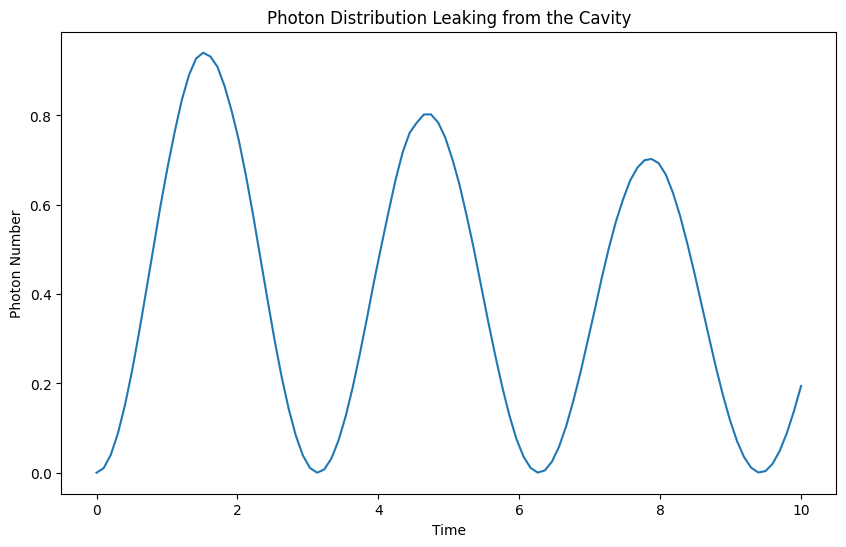

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
N = 10  # Number of cavity Fock states
kappa = 0.1 # Decay rate of the cavity
gamma = 0.05  # Decay rate of the atom
n_photons = 5  # Number of photons in the Fock state source
timesteps = 100  # Number of time steps
delta_t = 0.1  # Time step size

# Operators
a = tensor(destroy(N), qeye(2))  # Cavity annihilation operator
sigmap = tensor(qeye(N), create(2))  # Atomic excitation operator
sigmam = tensor(qeye(N), destroy(2))  # Atomic de-excitation operator

# Hamiltonian for the system
H_atom = 0.5 * gamma * sigmap * sigmam
H_cavity = 0.5 * kappa * (a.dag() * a)
H_coupling = sigmap * a.dag() + sigmam * a
H = H_atom + H_cavity + H_coupling

# Initial state
psi0 = tensor(basis(N, 0), basis(2, 0))

# Fock state source
source_state = fock(N, n_photons)

# Time evolution
tlist = np.linspace(0, timesteps * delta_t, timesteps)

# Define the collapse operators
c_ops = [np.sqrt(kappa) * a]

# Monte Carlo solver
output_states = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a])

# Plotting photon distribution
plt.figure(figsize=(10, 6))
plt.plot(tlist, output_states.expect[0])
plt.title('Photon Distribution Leaking from the Cavity')
plt.xlabel('Time')
plt.ylabel('Photon Number')
plt.show()


### Atomic Excitation

10.0%. Run time:   0.32s. Est. time left: 00:00:00:02
20.0%. Run time:   0.62s. Est. time left: 00:00:00:02
30.0%. Run time:   0.96s. Est. time left: 00:00:00:02
40.0%. Run time:   1.26s. Est. time left: 00:00:00:01
50.0%. Run time:   1.55s. Est. time left: 00:00:00:01
60.0%. Run time:   1.84s. Est. time left: 00:00:00:01
70.0%. Run time:   2.15s. Est. time left: 00:00:00:00
80.0%. Run time:   2.44s. Est. time left: 00:00:00:00
90.0%. Run time:   2.73s. Est. time left: 00:00:00:00
100.0%. Run time:   3.02s. Est. time left: 00:00:00:00
Total run time:   3.03s


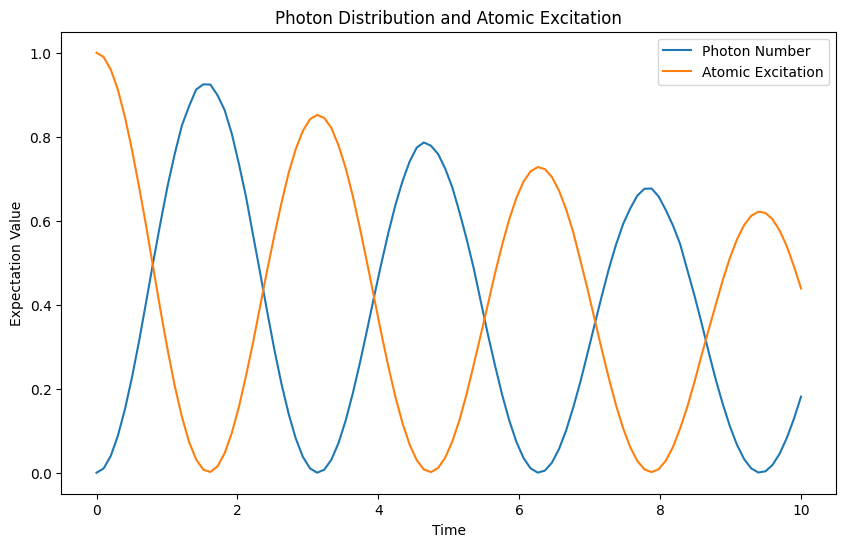

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
N = 10  # Number of cavity Fock states
kappa = 0.1  # Decay rate of the cavity
gamma = 0.05  # Decay rate of the atom
n_photons = 5  # Number of photons in the Fock state source
timesteps = 100  # Number of time steps
delta_t = 0.1  # Time step size

# Operators
a = tensor(destroy(N), qeye(2))  # Cavity annihilation operator
sigmap = tensor(qeye(N), create(2))  # Atomic excitation operator
sigmam = tensor(qeye(N), destroy(2))  # Atomic de-excitation operator

# Hamiltonian for the system
H_atom = 0.5 * gamma * sigmap * sigmam
H_cavity = 0.5 * kappa * (a.dag() * a)
H_coupling = sigmap * a.dag() + sigmam * a
H = H_atom + H_cavity + H_coupling

# Initial state
psi0 = tensor(basis(N, 0), basis(2, 0))

# Time evolution
tlist = np.linspace(0, timesteps * delta_t, timesteps)

# Define the collapse operators
c_ops = [np.sqrt(kappa) * a]

# Monte Carlo solver
output_states = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a, sigmap.dag() * sigmap])

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(tlist, output_states.expect[0], label='Photon Number')
plt.plot(tlist, output_states.expect[1], label='Atomic Excitation')
plt.title('Photon Distribution and Atomic Excitation')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()


### Population Dynamics

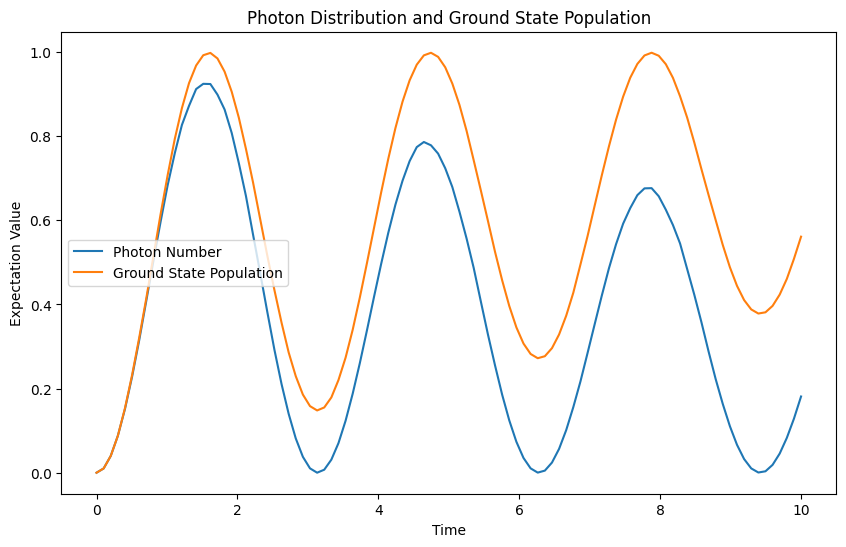

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(tlist, output_states.expect[0], label='Photon Number')
plt.plot(tlist, 1 - output_states.expect[1], label='Ground State Population')  # Calculate ground state population
plt.title('Photon Distribution and Ground State Population')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()